In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# User Study for multi-cohort MSI in CRC transformer paper

The notebook evaluates the results of the pathologist evaluation of high attention patches of the multi-cohort model in the paper.

Data properties:
* 40 patients from the YCR-BCIP cohort
* 20 patients with MSI-H ground truth, 20 patients with MSS ground truth
* for each group 10 patients with the lowest classification scores and 10 patients with the highest classification scores were selected
* 4 patches of the top100 highest scored attention patches per patient
* 2 with the highest classification scores, 2 with the lowest classification scores

In [2]:
# path to excel file with expert evaluations
path = Path('/Users/sophia.wagner/Documents/PhD/projects/idkidc/MSI_user_study.xlsx')
df = pd.read_excel(path, sheet_name='evaluation_sebastian')
df2 = pd.read_excel(path, sheet_name='evaluation_tingying')

In [3]:
# merge every 5 rows per patient to one row per patient
categories = []
for i in range(4):
    categories.extend(list(df[f'tile {i}'].dropna().unique()))
    categories.extend(list(df2[f'tile {i}'].dropna().unique()))
categories = list(set(categories))
categories.sort()

In [4]:
# ignore rare categories
categories.pop(categories.index('goblet cells'))
categories.pop(categories.index('signet ring cells'))

'signet ring cells'

In [5]:
# merge with classification scores of the model's predictions
scores = pd.read_excel(path, sheet_name='selected patients_10_low_high')
df = pd.merge(df, scores, on='FILENAME')
df2 = pd.merge(df2, scores, on='FILENAME')

### Check the frequency of patterns for the different cases

In [6]:
%%capture
# tile 0 and 1 with high classification scores
eval_df, eval_df2 = {}, {}
for c in categories:
    eval_df[c] = [0] * 4
    eval_df2[c] = [0] * 4
for gt in range(2):
    for hl in range(2):
        for tile in range(2):
            counts = df[df['ground_truth'] == gt][df['high_low'] == hl][f'tile {tile}'].value_counts()
            counts2 = df2[df2['ground_truth'] == gt][df2['high_low'] == hl][f'tile {tile}'].value_counts()

            for c in counts.keys():
                try:
                    eval_df[c][2 * gt + hl] += counts[c]
                except KeyError:
                    continue            
            for c in counts2.keys():
                try:
                    eval_df2[c][2 * gt + hl] += counts2[c]
                except KeyError:
                    continue
eval_df = pd.DataFrame(eval_df, index=['TN', 'FP', 'FN', 'TP']).T
eval_df2 = pd.DataFrame(eval_df2, index=['TN', 'FP', 'FN', 'TP']).T

In [7]:
eval_df, eval_df2

(                          TN  FP  FN  TP
 Granulocytes               0   0   0   0
 Plasma cell                0   0   0   0
 artifact                   0   0   0   0
 blood cells / vessels      2   7   3   0
 debris / necrotic tissue   0   0   0   0
 fat / adipose tissue       0   0   0   0
 lymphocytes                3   6   5   4
 mucin                      2   9  12   8
 mucosal epithelium         0   0   0   0
 smooth muscle              1   0   0   0
 stroma                     5   2   2   0
 tumor cells               20  20  20  20,
                           TN  FP  FN  TP
 Granulocytes               1   3   0   0
 Plasma cell                1   1   2   0
 artifact                   0   0   0   0
 blood cells / vessels      1   6   3   0
 debris / necrotic tissue   1   0   0   0
 fat / adipose tissue       0   0   0   0
 lymphocytes                7   9   4   7
 mucin                      5  11  11   6
 mucosal epithelium         0   0   0   0
 smooth muscle              4   0

In [8]:
%%capture
# tile 0 and 1 with high classification scores
eval_df, eval_df2 = {}, {}
for c in categories:
    eval_df[c] = [0] * 4
    eval_df2[c] = [0] * 4
for gt in range(2):
    for hl in range(2):
        for tile in range(2):
            try:
                counts = df[df['ground_truth'] == gt][df['high_low'] == hl][f'tile {tile + 2}'].value_counts()
            except KeyError:
                continue
            try:
                counts2 = df2[df2['ground_truth'] == gt][df2['high_low'] == hl][f'tile {tile + 2}'].value_counts()
            except KeyError:
                continue
            for c in counts.keys():
                try:
                    eval_df[c][2 * gt + hl] += counts[c]
                except KeyError:
                    continue            
            for c in counts2.keys():
                try:
                    eval_df2[c][2 * gt + hl] += counts2[c]
                except KeyError:
                    continue
eval_df = pd.DataFrame(eval_df, index=['TN', 'FP', 'FN', 'TP']).T
eval_df2 = pd.DataFrame(eval_df2, index=['TN', 'FP', 'FN', 'TP']).T

In [9]:
eval_df, eval_df2

(                          TN  FP  FN  TP
 Granulocytes               0   0   0   0
 Plasma cell                0   0   0   0
 artifact                   0   0   2   2
 blood cells / vessels      0   6   4   1
 debris / necrotic tissue   1   1   4   3
 fat / adipose tissue       0   0   0   0
 lymphocytes                1   5   6   2
 mucin                      0   2   4   0
 mucosal epithelium         0   0   0   0
 smooth muscle              2   0   0   1
 stroma                    14   6   1   6
 tumor cells               20  13  12  20,
                           TN  FP  FN  TP
 Granulocytes               1   1   0   0
 Plasma cell                0   0   0   0
 artifact                   0   0   0   0
 blood cells / vessels      1   4   3   3
 debris / necrotic tissue   1   1   3   2
 fat / adipose tissue       0   0   3   0
 lymphocytes                4   5   4   5
 mucin                      0   5   5   0
 mucosal epithelium         0   5   6   0
 smooth muscle             14   4

In [18]:
%%capture
# tile 0 and 1 with high classification scores
eval_df, eval_df2 = {}, {}
for c in categories:
    eval_df[c] = [0] * 4
    eval_df2[c] = [0] * 4
for gt in range(2):
    for hl in range(2):
        for tile in range(4):
            try:
                counts = df[df['ground_truth'] == gt][df['high_low'] == hl][f'tile {tile}'].value_counts()
            except KeyError:
                continue
            try:
                counts2 = df2[df2['ground_truth'] == gt][df2['high_low'] == hl][f'tile {tile}'].value_counts()
            except KeyError:
                continue
            for c in counts.keys():
                try:
                    eval_df[c][2 * gt + hl] += counts[c]
                except KeyError:
                    continue            
            for c in counts2.keys():
                try:
                    eval_df2[c][2 * gt + hl] += counts2[c]
                except KeyError:
                    continue
eval_df = pd.DataFrame(eval_df, index=['TN', 'FP', 'FN', 'TP']).T
eval_df2 = pd.DataFrame(eval_df2, index=['TN', 'FP', 'FN', 'TP']).T

In [19]:
eval_df, eval_df2

(                          TN  FP  FN  TP
 Granulocytes               0   0   0   0
 Plasma cell                0   0   0   0
 artifact                   0   0   2   2
 blood cells / vessels      2  13   7   1
 debris / necrotic tissue   1   1   4   3
 fat / adipose tissue       0   0   0   0
 lymphocytes                4  11  11   6
 mucin                      2  11  16   8
 mucosal epithelium         0   0   0   0
 smooth muscle              3   0   0   1
 stroma                    19   8   3   6
 tumor cells               40  33  32  40,
                           TN  FP  FN  TP
 Granulocytes               2   4   0   0
 Plasma cell                1   1   2   0
 artifact                   0   0   0   0
 blood cells / vessels      2  10   6   3
 debris / necrotic tissue   2   1   3   2
 fat / adipose tissue       0   0   3   0
 lymphocytes               11  14   8  12
 mucin                      5  16  16   6
 mucosal epithelium         0   5   6   0
 smooth muscle             18   4

In [24]:
%%capture
# all tiles with high attention scores
eval_df, eval_df2 = {}, {}
for c in categories:
    eval_df[c] = [0] * 2
    eval_df2[c] = [0] * 2
for tile in range(4):
    counts = df[f'tile {tile}'].value_counts()
    counts2 = df2[f'tile {tile}'].value_counts()
    for c in counts.keys():
        try:
            eval_df[c][tile // 2] += counts[c]
        except KeyError:
            pass    
    for c in counts2.keys():
        try:
            eval_df2[c][tile // 2] += counts2[c]
        except KeyError:
            pass
eval_df = pd.DataFrame(eval_df, index=['high', 'low']).T
eval_df2 = pd.DataFrame(eval_df2, index=['high', 'low']).T

In [25]:
eval_df, eval_df2

(                          high  low
 Granulocytes                 0    0
 Plasma cell                  0    0
 artifact                     0    4
 blood cells / vessels       12   11
 debris / necrotic tissue     0    9
 fat / adipose tissue         0    0
 lymphocytes                 18   14
 mucin                       31    6
 mucosal epithelium           0    0
 smooth muscle                1    3
 stroma                       9   27
 tumor cells                 80   65,
                           high  low
 Granulocytes                 4    2
 Plasma cell                  4    0
 artifact                     0    0
 blood cells / vessels       10   11
 debris / necrotic tissue     1    7
 fat / adipose tissue         0    3
 lymphocytes                 27   18
 mucin                       33   10
 mucosal epithelium           0   11
 smooth muscle                5   32
 stroma                      52   19
 tumor cells                 78   65)

In [26]:
results = {}
for hl in ['high', 'low']:
    results[hl] = {
        'mean': np.mean([eval_df[hl].values, eval_df2[hl].values], axis=0),
        'std': np.std([eval_df[hl].values, eval_df2[hl].values], axis=0)
    }

In [27]:
results

{'high': {'mean': array([ 2. ,  2. ,  0. , 11. ,  0.5,  0. , 22.5, 32. ,  0. ,  3. , 30.5,
         79. ]),
  'std': array([ 2. ,  2. ,  0. ,  1. ,  0.5,  0. ,  4.5,  1. ,  0. ,  2. , 21.5,
          1. ])},
 'low': {'mean': array([ 1. ,  0. ,  2. , 11. ,  8. ,  1.5, 16. ,  8. ,  5.5, 17.5, 23. ,
         65. ]),
  'std': array([ 1. ,  0. ,  2. ,  0. ,  1. ,  1.5,  2. ,  2. ,  5.5, 14.5,  4. ,
          0. ])}}

### Calculate statistisc whether patches with high and low classification scores follow the same distribution

In [28]:
from scipy.stats import chi2_contingency

# Create a contingency table from the two columns
observed = np.array([results['high']['mean'], results['low']['mean']])

# Calculate chi-square test and obtain the p-value
chi2, p_value, _, _ = chi2_contingency(observed)

print("Chi-squared statistic:", chi2)
print("P-value:", p_value)


Chi-squared statistic: 44.64901365330403
P-value: 5.59249882941685e-06


### Plotting the results

/var/folders/l4/hfjz7m7n4cq64bcml5ktlvn8ck1t7w/T/ipykernel_8041/1193745167.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('twilight')


ValueError: s must be a scalar, or float array-like with the same size as x and y

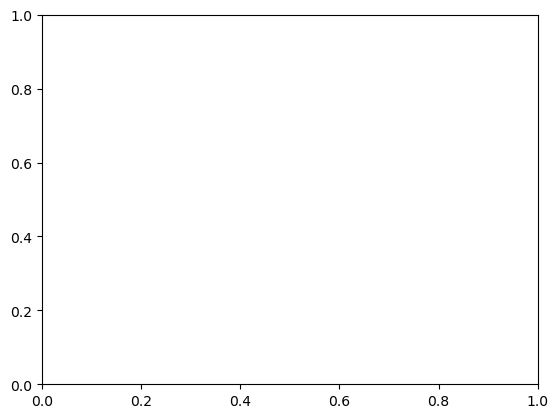

In [20]:
# Values for the bubbles
values = eval_df['FN'].values / 40
size = np.sqrt(values) * 8000

# Create x and y coordinates for the bubbles
X, Y = np.meshgrid(np.arange(3), np.arange(3))

cmap = plt.cm.get_cmap('twilight')
colors = cmap(np.arange(9) / 9)

# Plot the bubble chart
plt.scatter(X, Y, s=size, c=colors, label=values)
# plt.plot(X.flatten(), Y.flatten(), label=values)
plt.axis('off')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.show()

In [21]:
cmap = plt.cm.get_cmap('twilight')
colors = cmap(np.arange(9) / 9 + 0.2 % 1)

/var/folders/l4/hfjz7m7n4cq64bcml5ktlvn8ck1t7w/T/ipykernel_8041/994094747.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('twilight')


Plot bar plot per tissue category

In [29]:
eval_df = eval_df.sort_values(by=['high'], ascending=False)

(-0.8799999999999999, 11.879999999999999, -0.853125, 0.0)

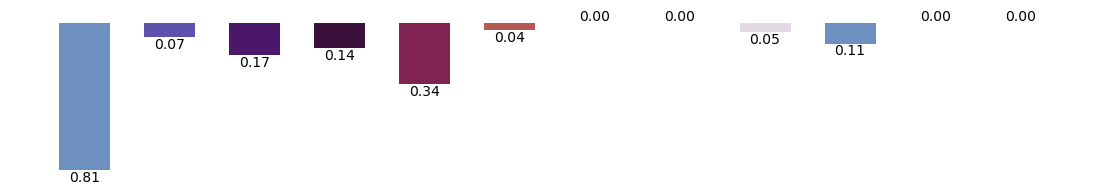

In [30]:
case = 'low'
fig, ax = plt.subplots(figsize=(14, 2))
ax.bar(np.arange(len(eval_df)), -eval_df[case] / 80, width=0.6, color=colors)
labels = [f'{(eval_df[case][i] / 80):.2f}' for i in range(len(eval_df))]
ax.bar_label(ax.containers[0], labels=labels, label_type='edge')
plt.axis('off')
# plt.savefig(figure_path / f'bar_{case}.svg',  format='svg', bbox_inches='tight', pad_inches=0)

In [31]:
eval_df

,high,low
tumor cells,80,65
mucin,31,6
lymphocytes,18,14
blood cells / vessels,12,11
stroma,9,27
smooth muscle,1,3
Granulocytes,0,0
Plasma cell,0,0
artifact,0,4
debris / necrotic tissue,0,9


In [32]:
ind = results['high']['mean'].argsort()[::-1]

(-0.8799999999999999, 11.879999999999999, 0.0, 1.05)

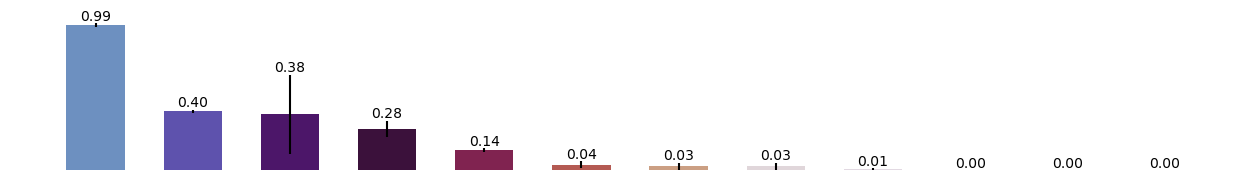

In [33]:
case = 'high'
n = len(results[case]['mean'])
fig, ax = plt.subplots(figsize=(16, 2))
bars = ax.bar(np.arange(n), results[case]['mean'][ind] / 80, yerr=results[case]['std'][ind] / 80, width=0.6, color=colors)
labels = [f"{(results[case]['mean'][ind][i] / 80):.2f}" for i in range(n)]
ax.bar_label(bars, labels=labels, label_type='edge')
plt.axis('off')
# plt.savefig(figure_path / f'bar_{case}_error_bars.svg',  format='svg', bbox_inches='tight', pad_inches=0)

(-0.8799999999999999, 11.879999999999999, -0.853125, 0.0)

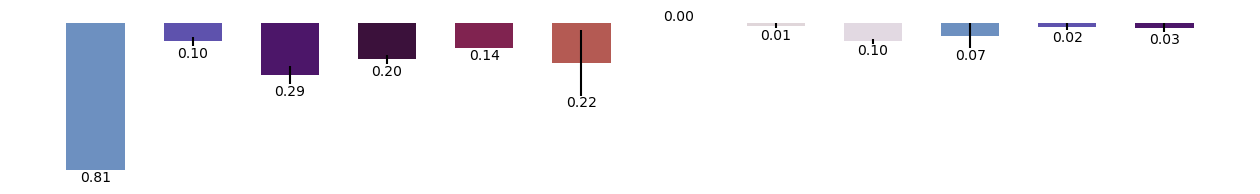

In [34]:
case = 'low'
n = len(results[case]['mean'])
fig, ax = plt.subplots(figsize=(16, 2))
bars = ax.bar(np.arange(n), -results[case]['mean'][ind] / 80, yerr=results[case]['std'][ind] / 80, width=0.6, color=colors)
labels = [f"{(results[case]['mean'][ind][i] / 80):.2f}" for i in range(n)]
ax.bar_label(bars, labels=labels, label_type='edge')
plt.axis('off')
# plt.savefig(figure_path / f'bar_{case}_error_bars.svg',  format='svg', bbox_inches='tight', pad_inches=0)

In [35]:
for i in range(n):
    print(f'{i}, {categories[ind[i]]}')

0, tumor cells
1, mucin
2, stroma
3, lymphocytes
4, blood cells / vessels
5, smooth muscle
6, Plasma cell
7, Granulocytes
8, debris / necrotic tissue
9, mucosal epithelium
10, fat / adipose tissue
11, artifact 
